In [91]:
import pandas
import math
from sklearn import neighbors, datasets
from numpy.random import permutation
import matplotlib.pyplot as plt
import numpy as np
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support

In [92]:
data = pandas.read_csv('csv/processed_data.csv')

In [93]:
random_indices = permutation(data.index)
test_cutoff = math.floor(len(data)/5)
print(test_cutoff)
test = data.loc[random_indices[1:test_cutoff]]
print(test)
train = data.loc[random_indices[test_cutoff:]]
train_output_data = train['univName']
train_input_data = train
train_input_data = train_input_data.drop('univName',1)
test_output_data = test['univName']
test_input_data = test
test_input_data = test_input_data.drop('univName',1)
print(test)

1054
      index  toeflScore  greV  greQ   greA    cgpa  cgpaScale  \
1940   4290         101   490   770    3.5  0.6920        100   
2737   5251         104   580   770    3.5  0.7730         10   
3817   8333          99   520   770    3.0  0.8890         10   
4849   9810         102   480   770    4.0  0.7300        100   
239     384         102   520   790    3.5  0.6900         10   
1900   4244          94   460   720    3.0  0.7600        100   
637    1522         116   620   800    4.5  0.7890         10   
2482   4948          97   370   740    3.0  0.8140        100   
3329   6816         110   520   800    4.0  0.7320         10   
2225   4632         105   490   710    3.0  0.7340        100   
2117   4507         105   520   770  305.0  0.8000        100   
2078   4456          88   330   750    3.0  0.8800         10   
4087   8917          97   500   800    3.0  0.6740        100   
860    2698         102   420   800    4.0  0.7774        100   
2540   5014         

In [94]:
def label_img(word_label):
    #print(word_label)
    if (word_label == 'University of Texas Arlington') : return np.array([1,0,0,0,0,0,0,0,0,0])
    elif (word_label == 'University of Utah') : return np.array([0,1,0,0,0,0,0,0,0,0])
    elif (word_label == 'Virginia Polytechnic Institute and State University') : return np.array([0,0,1,0,0,0,0,0,0,0])
    elif (word_label == 'Worcester Polytechnic Institute') : return np.array([0,0,0,1,0,0,0,0,0,0])
    elif (word_label == 'University of Wisconsin Madison') : return np.array([0,0,0,0,1,0,0,0,0,0])
    elif (word_label == 'Wayne State University') : return np.array([0,0,0,0,0,1,0,0,0,0])
    elif (word_label == 'University of Washington') : return np.array([0,0,0,0,0,0,1,0,0,0])
    elif (word_label == 'University of Southern California') : return np.array([0,0,0,0,0,0,0,1,0,0])
    elif (word_label == 'University of Texas Austin') : return np.array([0,0,0,0,0,0,0,0,1,0])
    elif (word_label == 'University of Texas Dallas') : return np.array([0,0,0,0,0,0,0,0,0,1])
    #else : return np.array([0,0,0,0,0,0,0,0,0,0])

In [95]:
trainlabel=[]
for i in train_output_data :
    train_labels=label_img(i)
    trainlabel.append(train_labels)

In [96]:
trainlabel=np.array(trainlabel)
print(trainlabel.shape)

(4217, 10)


In [97]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv1D, MaxPooling1D
from keras import backend as K
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(7,1)))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [98]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])



In [99]:
train_input_data=train_input_data.values.reshape(4217,7,1)

test_input_data=test_input_data.values.reshape(1053,7,1)

In [100]:
train_mean = np.mean(train_input_data, axis=0)
train_std = np.std(train_input_data, axis=0)
test_mean = np.mean(test_input_data, axis=0)
test_std = np.std(test_input_data, axis=0)

train_norm = (train_input_data - train_mean) / train_std
test_norm = (test_input_data - test_mean) / test_std

In [101]:
testlabel=[]
for i in test_output_data :
    test_labels=label_img(i)
    testlabel.append(test_labels)
    
testlabel=np.array(testlabel)
print(testlabel.shape)
print(train_input_data.shape)

(1053, 10)
(4217, 7, 1)


In [102]:

model.fit(train_norm, trainlabel, epochs=5, verbose=1)

Epoch 1/5
4217/4217 [==============================] - 1s 132us/step - loss: 1.5902 - acc: 0.5421
Epoch 2/5
4217/4217 [==============================] - 0s 43us/step - loss: 0.9926 - acc: 0.6891
Epoch 3/5
4217/4217 [==============================] - 0s 43us/step - loss: 0.8175 - acc: 0.7273
Epoch 4/5
4217/4217 [==============================] - 0s 42us/step - loss: 0.7371 - acc: 0.7470
Epoch 5/5
4217/4217 [==============================] - 0s 42us/step - loss: 0.6854 - acc: 0.7641


In [103]:

def call(x):
    if x==1:
        return 'University of Utah'
    if x==2:
        return 'Virginia Polytechnic Institute and State University'
    if x==3:
        return 'Worcester Polytechnic Institute'
    if x==4:
        return 'University of Wisconsin Madison'
    if x==5:
        return 'Wayne State University'
    if x==6:
        return 'University of Washington'
    if x==7:
        return 'University of Southern California'
    if x==8:
        return 'University of Texas Austin'
    if x==9:
        return 'University of Texas Dallas'
    if x==0:
        return 'University of Texas Arlington'

In [104]:
from numpy.random import randint
from numpy import argmax
from keras.utils.np_utils import to_categorical

score = model.evaluate(test_norm, testlabel, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1]*100)

y=model.predict(test_norm[1043:1044])
#print(test_input_data[1:])
print(y)
m=call(np.argmax(y))
print(m)



1053/1053 [==============================] - 0s 99us/step
Test loss: 0.6129309251437499
Test accuracy: 79.77207984566576
[[9.2286058e-02 1.2131513e-04 1.9383318e-05 1.3141396e-06 3.8420939e-07
  2.1130288e-06 1.1862421e-05 9.0508252e-01 2.4139904e-03 6.1065337e-05]]
University of Southern California


In [105]:
from sklearn.metrics import classification_report
y_pred=model.predict(test_norm, batch_size=20, verbose=2)
report = classification_report(testlabel, y_pred.round())
print(report)

              precision    recall  f1-score   support

           0       0.79      0.70      0.74       130
           1       0.00      0.00      0.00        59
           2       0.00      0.00      0.00        51
           3       0.00      0.00      0.00        15
           4       0.00      0.00      0.00        39
           5       0.00      0.00      0.00        32
           6       0.00      0.00      0.00        40
           7       0.84      0.92      0.88       226
           8       0.67      0.10      0.17        20
           9       0.92      0.98      0.95       441

   micro avg       0.88      0.70      0.78      1053
   macro avg       0.32      0.27      0.27      1053
weighted avg       0.68      0.70      0.68      1053
 samples avg       0.70      0.70      0.70      1053



/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)


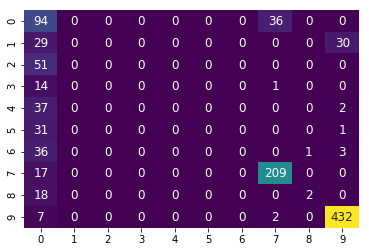

In [106]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
def draw_confusion_matrix(true,preds):
    conf_matx = confusion_matrix(true, preds)
    sns.heatmap(conf_matx, annot=True,annot_kws={"size": 12},fmt='g', cbar=False, cmap="viridis")
    plt.show()
draw_confusion_matrix(testlabel.argmax(axis=1), y_pred.round().argmax(axis=1))